In [161]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [162]:
np.random.seed(0)

In [163]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [164]:
assert(X_train.shape[0] == Y_train.shape[0]), "The number of training images is not equal to the number of labels."
assert(X_test.shape[0] == Y_test.shape[0]), "The number of testing images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the training images is not 28x28."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the testing images is not 28x28."

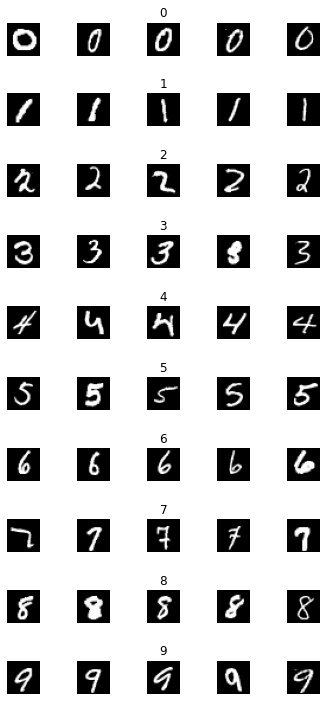

In [165]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axes = plt.subplots(nrows =  num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[Y_train == j]
    axes[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
    axes[j][i].axis("off")
    if i == 2:
      axes[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

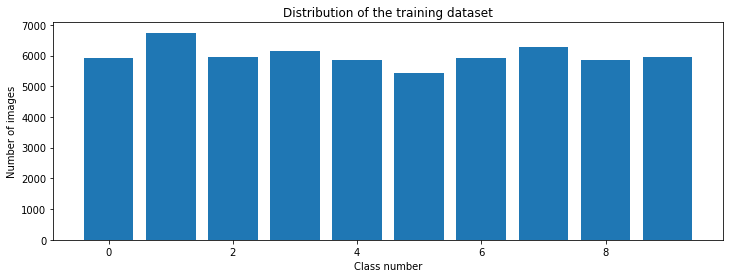

In [166]:
print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [167]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [168]:
X_train = X_train / 255
X_test = X_test / 255

In [169]:
number_pixels = 784
X_train = X_train.reshape(X_train.shape[0], number_pixels)
X_test = X_test.reshape(X_test.shape[0], number_pixels)

In [170]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=number_pixels, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [171]:
model = create_model()
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                7850      
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [172]:
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.8483 - val_loss: 0.2565 - val_accuracy: 0.9255
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2985 - accuracy: 0.9145 - val_loss: 0.2506 - val_accuracy: 0.9272
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.9232 - val_loss: 0.2194 - val_accuracy: 0.9367
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2520 - accuracy: 0.9284 - val_loss: 0.2120 - val_accuracy: 0.9393
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2427 - accuracy: 0.9299 - val_loss: 0.2039 - val_accuracy: 0.9448
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2353 - accuracy: 0.9326 - val_loss: 0.2012 - val_accuracy: 0.9428
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2238 - accuracy: 0.9358 - val_loss: 0.1954 - val_accuracy: 0.9475
Epoch 

Text(0.5, 0, 'epoch')

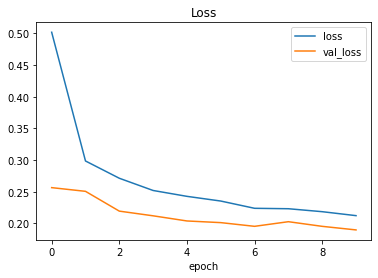

In [173]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

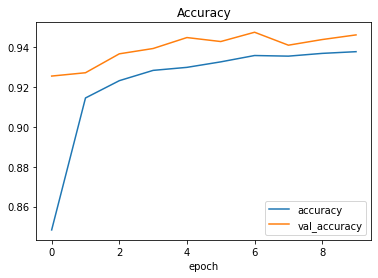

In [174]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [175]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Test score : ', score[0])
print('Test Acc : ', score[1])

Test score :  0.22647503018379211
Test Acc :  0.9362999796867371


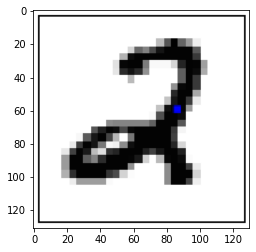

In [176]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

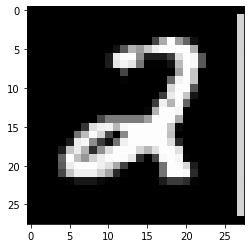

In [177]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

check_image = cv2.bitwise_not(gray_scale)

plt.imshow(check_image, cmap = plt.get_cmap("gray"))

In [178]:
check_image = check_image/255
check_image = check_image.reshape(1, 784)

In [181]:
prediction = np.argmax(model.predict(check_image),axis=1)
print("Pedicetd digit : ", str(prediction))

Pedicetd digit :  [2]
